In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [10]:
from scipy.stats import multivariate_normal

[Scipy Documentation of multivariate_normal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal)

### Definition of a (multivariate) Gaussian distribution:

$$ \mathcal{N}(\mathbf{x}; \boldsymbol	{\mu}, \Sigma) = \frac{1}{(2\pi)^{n/2} \vert \Sigma \vert^{1/2}} \exp \left( - \frac{1}{2}(\mathbf{x} - \boldsymbol{\mu})^T \Sigma^{-1}  (\mathbf{x} - \boldsymbol{\mu}) \right) \qquad \mathbf{x}, \boldsymbol{\mu} \in \mathbb{R}^n, \Sigma \in \mathbb{R}^{n \times n} $$

### Probability density function (pdf) and cumulative distribution function (cdf) of a one-dimensional Gaussian:

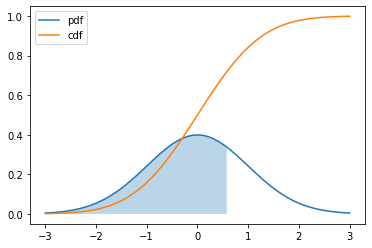

In [11]:
N = 100
x = np.linspace(-3.0, 3.0, N)

rv = multivariate_normal(mean=0., cov=1)

plt.plot(x, rv.pdf(x), label="pdf")
plt.plot(x, rv.cdf(x), label="cdf")
plt.fill_between(x[:60], rv.pdf(x[:60]), 0, alpha=0.3)
plt.legend()

If you have trouble understanding the relationship between probabilities and probability densities, there is a really nice explanatory video by "3blue1brown" on youtube:

[Why “probability of 0” does not mean “impossible”](https://youtu.be/ZA4JkHKZM50)

We can draw samples from Gaussians with given mean and covariance:

In [12]:
# Sample from this distribution:
multivariate_normal.rvs(mean=0., cov=1., size=10)

array([-1.05757951,  0.87183604, -0.35713569, -1.27498506, -0.73652707,
       -0.40916317, -0.57600425,  0.14492993, -1.015547  , -0.03566963])

In [13]:
multivariate_normal.rvs(mean=[0, 0], cov=[[1, 0.5], [0.5, 1]], size=10)

array([[ 0.47157665, -0.17637021],
       [-0.68316332,  1.60977335],
       [-0.44480935, -0.89603769],
       [-1.29650582, -0.94388421],
       [ 0.33680447, -2.18294037],
       [ 0.86720034,  1.33378948],
       [-0.69626493,  0.91988352],
       [ 0.08374556, -0.3769708 ],
       [-1.7716255 , -2.11426642],
       [ 0.93560045,  1.21809971]])

### Products of (multivariate) Gaussians are Gaussians:

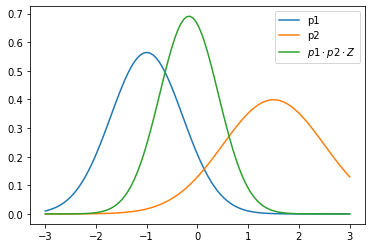

In [14]:
p1 = multivariate_normal.pdf(x, mean=-1., cov=0.5)
p2 = multivariate_normal.pdf(x, mean=1.5, cov=1.)

plt.plot(x, p1, label="p1")
plt.plot(x, p2, label="p2")

p3 = p1 * p2
Zinv = np.trapz(p3, x) # normalization constant
p3 = p3 / Zinv

plt.plot(x, p3, label="$p1 \cdot p2 \cdot Z$")
plt.legend()

A two-dimensional multivariate Gaussian distribution can be written as follows:

\begin{equation}
p(x,y) = \mathcal{N}(\mathbf{x}; \mathbf{\mu}, \mathbf{\Sigma}) = \mathcal{N} \left[ \begin{pmatrix} x \\ y \end{pmatrix}; \begin{pmatrix} \mu_x \\ \mu_y \end{pmatrix}, \begin{pmatrix} \Sigma_{xx} & \Sigma_{xy} \\ \Sigma_{yx} & \Sigma_{yy} \end{pmatrix}     \right])
\end{equation}

\begin{equation}
\mathbf{x} = \begin{pmatrix} x \\ y \end{pmatrix}, \qquad \mathbf{\mu} = \begin{pmatrix} \mu_x \\ \mu_y \end{pmatrix}, \qquad \mathbf{\Sigma} = \begin{pmatrix} \Sigma_{xx} & \Sigma_{xy} \\ \Sigma_{yx} & \Sigma_{yy} \end{pmatrix}
\end{equation}

We can visualize it by using a contour plot:

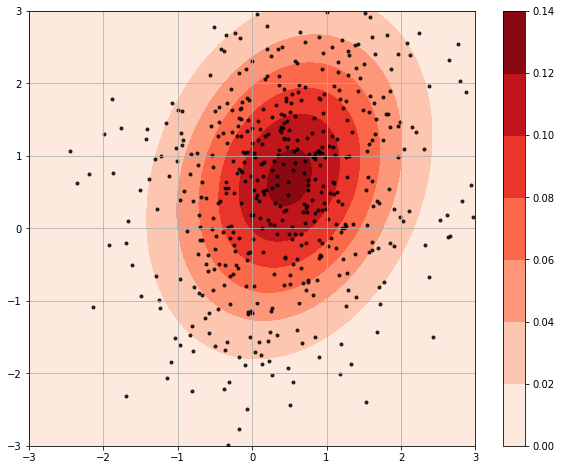

In [15]:
m = [0.5, 0.7]
S = [[1, 0.3], [0.3, 1.7]]

N = 100
x = np.linspace(-3.0, 3.0, N)
y = np.linspace(-3.0, 3.0, N)

X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

rv = multivariate_normal(m, S)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

# contour plot
cf = ax.contourf(x, y, rv.pdf(pos), cmap="Reds")
fig.colorbar(cf, ax=ax)

# samples
n_samples = 500
rv_samples = rv.rvs(size=n_samples)

ax.scatter(rv_samples[:,0], rv_samples[:,1], marker=".", color="black", alpha=0.8)

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

ax.grid()

Or a 3D plot:

Text(0.5, 0, 'p(x,y)')

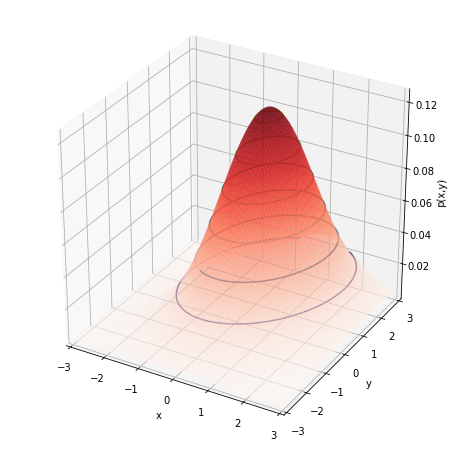

In [16]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos), rstride=1, cstride=1,
                cmap='Reds', edgecolor='none', alpha=0.7)

cf = ax.contour(x, y, rv.pdf(pos))

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("p(x,y)")

### Marginal distributions can be derived by taking the integral:


\begin{equation}
p(x) = \int \mathcal{N} \left[ \begin{pmatrix} x \\ y \end{pmatrix}; \begin{pmatrix} \mu_x \\ \mu_y \end{pmatrix}, \begin{pmatrix} \Sigma_{xx} & \Sigma_{xy} \\ \Sigma_{yx} & \Sigma_{yy} \end{pmatrix}     \right] dy = \mathcal{N}(x; \mu_x, \Sigma_{xx})
\end{equation}

\begin{equation}
p(y) = \int \mathcal{N} \left[ \begin{pmatrix} x \\ y \end{pmatrix}; \begin{pmatrix} \mu_x \\ \mu_y \end{pmatrix}, \begin{pmatrix} \Sigma_{xx} & \Sigma_{xy} \\ \Sigma_{yx} & \Sigma_{yy} \end{pmatrix}     \right] dx = \mathcal{N}(y; \mu_y, \Sigma_{yy})
\end{equation}


[PRML, p. 88 ff.]

This corresponds to the sum rule of probability. It also holds for empirical samples of Gaussian distributions, as shown in the following figure:

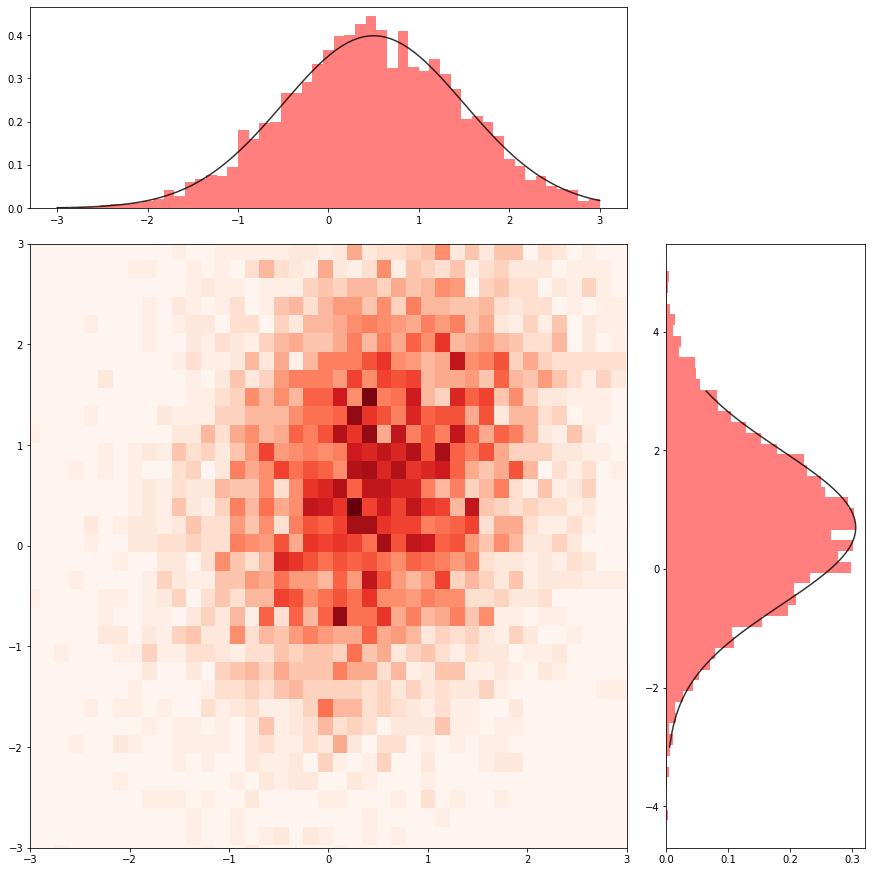

In [17]:
n_samples = 5000
rv_samples = rv.rvs(size=n_samples)

widths = [12, 4]
heights = [4, 12]
gs_kw = dict(width_ratios=widths, height_ratios=heights)
fig, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True, gridspec_kw=gs_kw, figsize=(12,12))

axes[0,0].hist(rv_samples[:,0], 51, color="red", alpha=0.5, range=[-3,3], density=True)
axes[0,0].plot(x, multivariate_normal.pdf(x, mean=m[0], cov=S[0][0]), color="black", alpha=0.8)

hist = axes[1,0].hist2d(rv_samples[:,0], rv_samples[:,1], bins=51, cmap="Reds")
#axes[1,0].scatter(rv_samples[:,0], rv_samples[:,1], marker=".", color="black", alpha=0.8)
axes[1,0].set_xlim([-3, 3])
axes[1,0].set_ylim([-3, 3])

axes[1,1].hist(rv_samples[:,1], 51, orientation="horizontal", color="red", alpha=0.5, density=True)
axes[1,1].plot(multivariate_normal.pdf(y, mean=m[1], cov=S[1][1]), y, color="black", alpha=0.8)

axes[0,1].remove()

### Products of (multivariate) Gaussians are Gaussians:

$$ \mathcal{N}(x; \mu_a, \Sigma_a) \cdot \mathcal{N}(x; \mu_b, \Sigma_b) = Z \cdot \mathcal{N}(x; \mu_c, \Sigma_c)$$

$$ \Sigma_c = ( \Sigma_a^{-1} + \Sigma_b^{-1} )^{-1} $$

$$ \mu_c = \Sigma_c ( \Sigma_a^{-1} \mu_a + \Sigma_b^{-1} \mu_b )^{-1} $$

$$ Z = \mathcal{N}(\mu_a; \mu_b, \Sigma_a + \Sigma_b) $$

Text(0.5, 1.0, 'P1*P2*Z')

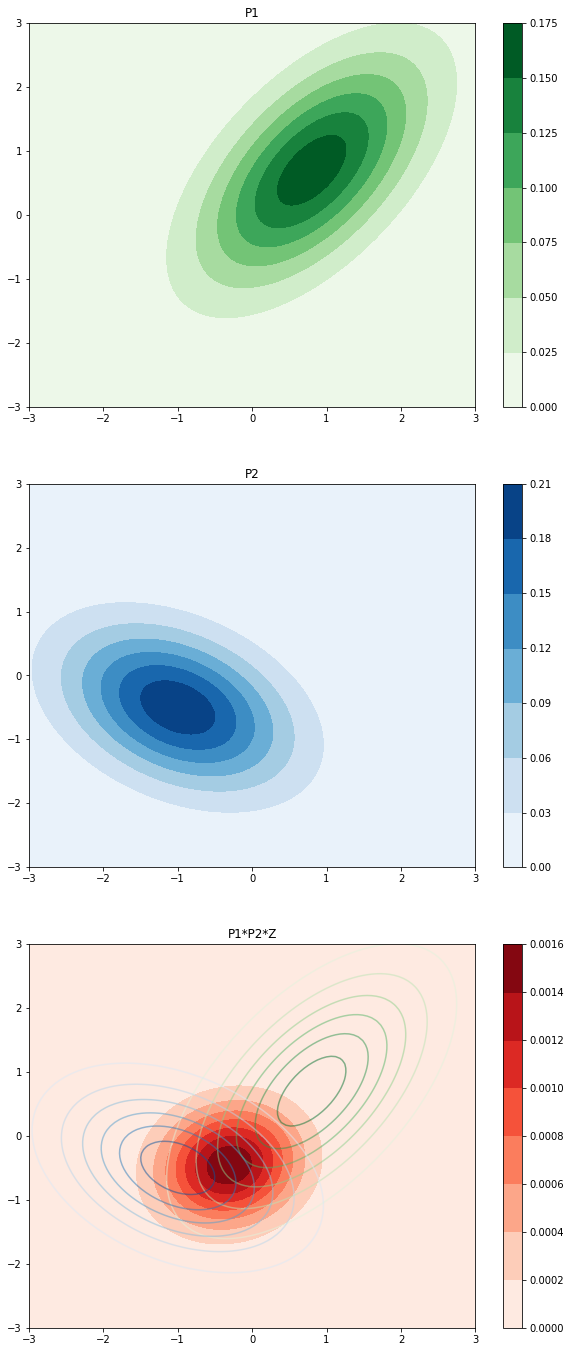

In [18]:
fig = plt.figure(figsize=(10,24))
ax = fig.subplots(3)

m = [0.8, 0.7]
S = [[1, 0.7], [0.7, 1.4]]
rv = multivariate_normal(m, S)
cf = ax[0].contourf(x, y, rv.pdf(pos), cmap="Greens")
fig.colorbar(cf, ax=ax[0])
ax[0].set_title("P1")

m2 = [-1,-0.5]
S2 = [[1, -0.5], [-0.3, .7]]
rv2 = multivariate_normal(m2, S2)
cf2 = ax[1].contourf(x, y, rv2.pdf(pos), cmap="Blues")
fig.colorbar(cf2, ax=ax[1])
ax[1].set_title("P2")

pprod = rv.pdf(pos)*rv2.pdf(pos)
pprod = pprod / pprod.sum()
cf3 = ax[2].contourf(x, y, pprod, cmap="Reds")
ax[2].contour(x, y, rv.pdf(pos), cmap="Greens", alpha=0.5)
ax[2].contour(x, y, rv2.pdf(pos), cmap="Blues", alpha=0.5)
fig.colorbar(cf3, ax=ax[2])
ax[2].set_title("P1*P2*Z")

### Linear Mappings of Gaussians are Gaussians:

\begin{eqnarray}
& p(\mathbf x) &= \mathcal{N}(\mathbf{x}; \boldsymbol{\mu}, \Sigma)\\
\Rightarrow & p(A \mathbf{x}) &= \mathcal{N}(A \mathbf{x}; A \boldsymbol{\mu}, A \Sigma A^T)
\end{eqnarray}

To linearly project a Gaussian variable, project the parameters.

### Conditionals of Gaussians are Gaussians:

\begin{equation}
p(x \mid y) =  \frac{p(x,y)}{p(y)} = \mathcal{N}\left(y; \mu_{x \mid y}, \Sigma_{x \mid y} \right) 
\end{equation}

\begin{equation}
\mu_{x \mid y} = \mu_x + \Sigma_{xy} \Sigma^{-1}_{yy} (y - \mu_y)
\end{equation}

\begin{equation}
\Sigma_{x \mid y} =  \Sigma_{xx} - \Sigma_{xy} \Sigma^{-1}_{yy} \Sigma_{yx}
\end{equation}


[PRML, p. 85 ff.]

### Bayes’ theorem for Gaussian variables:

Given a marginal Gaussian distribution for x and a conditional Gaussian distribution
for y given x in the form:

$$ p(x) = \mathcal{N}(x; \mu, \Sigma_x) $$
$$ p(y \vert x) = \mathcal{N}(y; A x + b, \Sigma_y) $$

the marginal distribution of y and the conditional distribution of x given y are
given by:

[...]


[PRML, p. 90 ff.]

### Conclusions:

* Products of Gaussians are Gaussians
* Linear Projections of Gaussians are Gaussians
* Marginals of Gaussians are Gaussians
* Conditionals of Gaussians are Gaussians
* Bayesian Inference with Gaussians can be mapped onto Linear Algebra




See also:

* Bishop, C., 2006. Pattern recognition and machine learning
* Hennig, P., 2020. Probabilistic Machine Learning. lecture course, University of Tübingen \
https://uni-tuebingen.de/en/180804